In [1]:
#Load libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from copulas.multivariate import GaussianMultivariate
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
from gaussian_multivariate import DataPreProcessor

In [3]:
HOME_PATH = '' #home path of the project
TRAIN_FILE = 'REAL DATASETS/TRAIN DATASETS/D_ContraceptiveMethod_Real_Train.csv'
SYNTHETIC_FILE = 'SYNTHETIC DATASETS/GM/D_ContraceptiveMethod_Synthetic_GM.csv'

## 1. Read data

In [4]:
real_data = pd.read_csv(HOME_PATH + TRAIN_FILE)
categorical_features = ['wife_education','husband_education','wife_religion','wife_working','husband_occupation',
                        'standard_of_living_index','media_exposure','contraceptive_method_used']
for c in categorical_features :
    real_data[c] = real_data[c].astype('category')
data_train = real_data
data_train

,wife_age,wife_education,husband_education,children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method_used
0,36,2,4,11,1,1,1,4,1,3
1,48,1,3,4,1,1,3,3,1,1
2,38,1,2,8,1,1,3,3,1,1
3,27,2,2,5,1,1,3,1,0,3
4,26,3,2,4,1,1,3,4,0,3
...,...,...,...,...,...,...,...,...,...,...
1173,34,2,4,6,1,0,3,4,0,1
1174,23,4,4,1,1,0,3,4,0,2
1175,29,3,4,3,1,1,3,2,0,3
1176,37,4,4,5,0,0,2,4,0,3


In [5]:
data_train.dtypes

wife_age                        int64
wife_education               category
husband_education            category
children                        int64
wife_religion                category
wife_working                 category
husband_occupation           category
standard_of_living_index     category
media_exposure               category
contraceptive_method_used    category
dtype: object

In [6]:
# data configuration
preprocessor = DataPreProcessor(data_train)
data_train = preprocessor.preprocess_train_data()
data_train

,wife_age,children,wife_education0,wife_education1,wife_education2,wife_education3,husband_education0,husband_education1,husband_education2,husband_education3,...,husband_occupation3,standard_of_living_index0,standard_of_living_index1,standard_of_living_index2,standard_of_living_index3,media_exposure0,media_exposure1,contraceptive_method_used0,contraceptive_method_used1,contraceptive_method_used2
0,36,11,0.500000,0.730957,0.500000,0.500000,0.5,0.500000,0.500000,0.730957,...,0.5,0.500000,0.500000,0.500000,0.730957,0.500000,0.730957,0.500000,0.500000,0.730957
1,48,4,0.730957,0.500000,0.500000,0.500000,0.5,0.500000,0.730957,0.500000,...,0.5,0.500000,0.500000,0.730957,0.500000,0.500000,0.730957,0.730957,0.500000,0.500000
2,38,8,0.730957,0.500000,0.500000,0.500000,0.5,0.730957,0.500000,0.500000,...,0.5,0.500000,0.500000,0.730957,0.500000,0.500000,0.730957,0.730957,0.500000,0.500000
3,27,5,0.500000,0.730957,0.500000,0.500000,0.5,0.730957,0.500000,0.500000,...,0.5,0.730957,0.500000,0.500000,0.500000,0.730957,0.500000,0.500000,0.500000,0.730957
4,26,4,0.500000,0.500000,0.730957,0.500000,0.5,0.730957,0.500000,0.500000,...,0.5,0.500000,0.500000,0.500000,0.730957,0.730957,0.500000,0.500000,0.500000,0.730957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,34,6,0.500000,0.730957,0.500000,0.500000,0.5,0.500000,0.500000,0.730957,...,0.5,0.500000,0.500000,0.500000,0.730957,0.730957,0.500000,0.730957,0.500000,0.500000
1174,23,1,0.500000,0.500000,0.500000,0.730957,0.5,0.500000,0.500000,0.730957,...,0.5,0.500000,0.500000,0.500000,0.730957,0.730957,0.500000,0.500000,0.730957,0.500000
1175,29,3,0.500000,0.500000,0.730957,0.500000,0.5,0.500000,0.500000,0.730957,...,0.5,0.500000,0.730957,0.500000,0.500000,0.730957,0.500000,0.500000,0.500000,0.730957
1176,37,5,0.500000,0.500000,0.500000,0.730957,0.5,0.500000,0.500000,0.730957,...,0.5,0.500000,0.500000,0.500000,0.730957,0.730957,0.500000,0.500000,0.500000,0.730957


## 2. Train the model and generate data

In [7]:
gm = GaussianMultivariate()
gm.fit(data_train)

In [8]:
generated_samples = gm.sample(len(data_train))
generated_samples

,wife_age,children,wife_education0,wife_education1,wife_education2,wife_education3,husband_education0,husband_education1,husband_education2,husband_education3,...,husband_occupation3,standard_of_living_index0,standard_of_living_index1,standard_of_living_index2,standard_of_living_index3,media_exposure0,media_exposure1,contraceptive_method_used0,contraceptive_method_used1,contraceptive_method_used2
0,45.756573,1.840011,0.492213,0.468606,0.514655,0.759679,0.495281,0.467167,0.709271,0.736852,...,0.500500,0.486727,0.484199,0.757998,0.510252,0.721513,0.509441,0.783259,0.455210,0.496593
1,13.920022,-0.875569,0.490828,0.699493,0.493216,0.548215,0.504303,0.528826,0.440930,0.763906,...,0.504192,0.499882,0.449470,0.726623,0.743565,0.741362,0.489586,0.537650,0.474082,0.735709
2,22.578576,1.542033,0.485927,0.546046,0.747461,0.469933,0.497314,0.512615,0.545583,0.506312,...,0.499962,0.534957,0.732130,0.494074,0.475573,0.703137,0.527844,0.485199,0.485091,0.761834
3,33.280058,2.601728,0.493091,0.528104,0.468320,0.746437,0.509073,0.493821,0.497253,0.724470,...,0.505597,0.485266,0.486807,0.510144,0.750456,0.732707,0.498257,0.734948,0.486456,0.508659
4,30.744788,1.992407,0.502341,0.512926,0.724320,0.482825,0.496045,0.509854,0.508161,0.705189,...,0.488836,0.737665,0.491191,0.515364,0.497971,0.739771,0.491195,0.516789,0.517175,0.519906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,43.375204,2.850946,0.729793,0.458269,0.503020,0.731919,0.500468,0.717983,0.485097,0.690030,...,0.496329,0.502902,0.539943,0.497768,0.515876,0.710885,0.520057,0.720360,0.529331,0.479417
1174,17.239274,1.884766,0.492908,0.721492,0.538337,0.483184,0.495597,0.543207,0.712753,0.478824,...,0.495721,0.506463,0.775702,0.493034,0.461924,0.719615,0.511317,0.755647,0.485944,0.489196
1175,36.398892,7.958984,0.491417,0.489373,0.527792,0.720558,0.497863,0.496319,0.477144,0.758335,...,0.500717,0.503268,0.476879,0.703290,0.700321,0.732511,0.498434,0.438686,0.764841,0.713860
1176,27.380025,2.152216,0.474913,0.509908,0.732386,0.518693,0.502084,0.506356,0.491698,0.724718,...,0.497891,0.489644,0.520866,0.491653,0.723419,0.756625,0.474336,0.442491,0.694166,0.760451


## 3. Transform Generated Data

In [9]:
synthetic_data = preprocessor.transform_data(generated_samples)
synthetic_data

,wife_age,wife_education,husband_education,children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method_used
0,45,4,4,1,0,1,1,3,0,1
1,13,2,4,0,1,0,3,4,0,3
2,22,3,3,1,1,1,3,2,0,3
3,33,4,4,2,0,1,2,4,0,1
4,30,3,4,1,1,1,3,1,0,3
...,...,...,...,...,...,...,...,...,...,...
1173,43,4,2,2,0,1,2,2,0,1
1174,17,2,3,1,1,1,3,2,0,1
1175,36,4,4,7,1,0,1,3,0,2
1176,27,3,4,2,0,0,3,4,0,3


In [10]:
real_data.describe()

,wife_age,children
count,1178.000000,1178.000000
mean,32.829372,3.345501
std,8.332956,2.425505
min,16.000000,0.000000
25%,26.000000,2.000000
50%,32.000000,3.000000
75%,39.000000,5.000000
max,49.000000,16.000000


In [11]:
synthetic_data.describe()

,wife_age,wife_education,husband_education,children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method_used
count,1178.000000,1178.00000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000
mean,31.914261,2.98472,3.419355,2.845501,0.863328,0.727504,2.151952,3.144312,0.075552,1.982173
std,8.539495,1.00370,0.804004,2.490062,0.343647,0.445433,0.860638,0.961213,0.264392,0.879593
min,13.000000,1.00000,1.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,25.000000,2.00000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,31.000000,3.00000,4.000000,2.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,38.000000,4.00000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,52.000000,4.00000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


In [12]:
len(synthetic_data.columns)

10

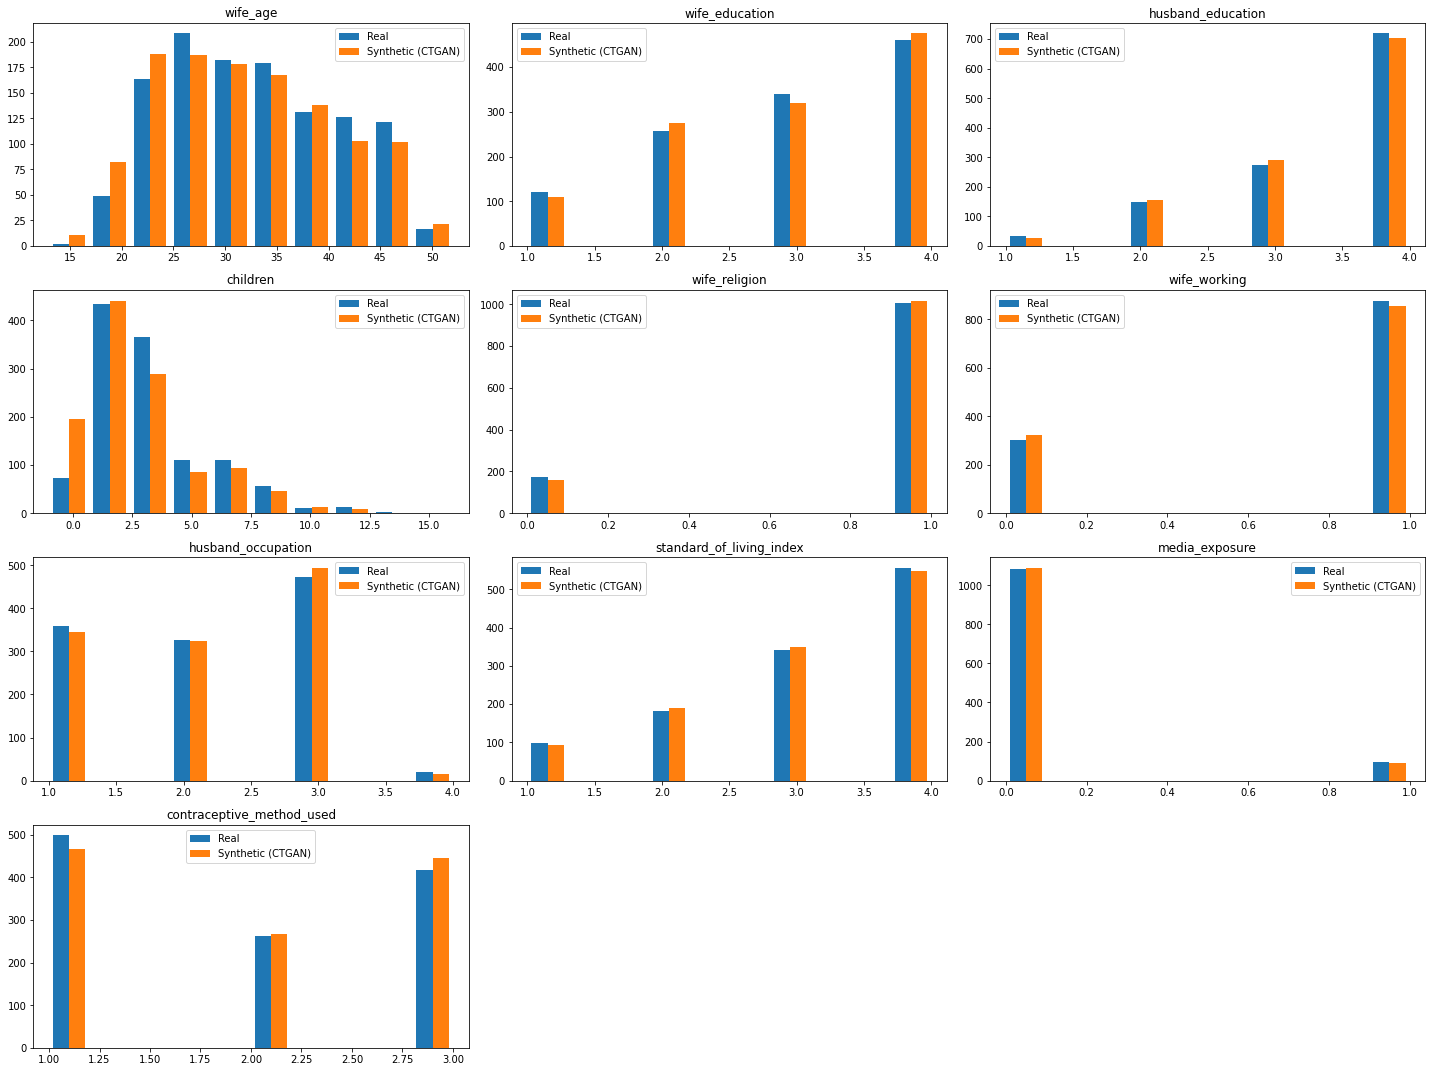

In [13]:
columns = real_data.columns
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20,15))
idx = {0:[0,0], 1:[0,1], 2:[0,2], 3:[1,0], 4:[1,1], 5:[1,2], 6:[2,0], 7:[2,1], 8:[2,2], 9:[3,0], 10:[3,1], 11:[3,2]}
for i in range(0,len(columns)) :
    data = np.column_stack((real_data[columns[i]], synthetic_data[columns[i]]))
    axs[idx[i][0], idx[i][1]].hist(data, density=False, histtype='bar', label=['Real','Synthetic (CTGAN)'])
    axs[idx[i][0], idx[i][1]].set_title(columns[i])
    axs[idx[i][0], idx[i][1]].legend()
fig.delaxes(axs[3,1])
fig.delaxes(axs[3,2])
fig.tight_layout(pad=1.1)

In [14]:
synthetic_data.to_csv(HOME_PATH + SYNTHETIC_FILE, index = False)